### The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
-	Text: The content of the blog post. Column name: Data
-	Category: The category to which the blog post belongs. Column name: Labels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snjvm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snjvm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\snjvm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv(r".\data\blogs.csv")

# Data Exploration
print("Label Distribution:")
print(df['Labels'].value_counts())



Label Distribution:
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64


#### Data Exploration and Preprocessing
The dataset contains 2,000 blog posts across 20 different categories, with each category having exactly 100 posts, representing a perfectly balanced dataset. 





In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Data      0
Labels    0
dtype: int64


In [6]:
# 2. Preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # checking if the text passed is string or not 
    # This line ensures that if the data is "garbage," it just returns an empty string instead of breaking your program.
    if not isinstance(text, str): 
        return ""
    # Lowercase
    text = text.lower() 
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenization: It chops the long sentence into a list of individual words (called "tokens").
    tokens = word_tokenize(text)
    # Remove stopwords 
    tokens = [w for w in tokens if not w in stop_words]
    return " ".join(tokens)

print("\nStarting preprocessing...")
df['cleaned_data'] = df['Data'].apply(preprocess_text)
print("Preprocessing finished.")




Starting preprocessing...
Preprocessing finished.


#### Preprocessing Steps Taken: 

- Case Folding: Converted all text to lowercase.
- Punctuation & Noise Removal: Removed all punctuation and numerical digits using regular expressions.
- Tokenization: Split the text into individual words.
- Stopword Removal: Eliminated common English words (e.g., "the", "and", "is") that do not contribute to the category meaning.


In [8]:
df.Data[0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [9]:
df.cleaned_data[0]

'path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnidedsfrank frankdsuucp frank odwyer newsgroups altatheism subject islamic genocide date apr gmt organization siemensnixdorf ag lines distribution world messageid rvejkhorusapmchpsnide references roaqefidoasdsgicom rublbdhorusapmchpsnide rekuofidoasdsgicom nntppostinghost dsapmchpsnide article rekuofidoasdsgicom liveseysolntzewpdsgicom jon livesey writes article rublbdhorusapmchpsnide frankdsuucp frank odwyer writes article roaqefidoasdsgicom liveseysolntzewpdsgicom jon livesey writes noting particular society case mainland uk religously motivated murders murders kind says little whether interreligion murders elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates one kill motivates allows christian bible says one may kill certain circumstances fa

In [10]:
# ---  Feature Extraction and NB Model ---

print("Training Naive Bayes Model...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_data'])
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
# ---  Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)



Training Naive Bayes Model...

Accuracy: 0.8400

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
  

##### Feature Extraction: Utilized TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical vectors, limiting the vocabulary to the top 5,000 most relevant features.

### Overall Performance and Robustness

1. High Reliability: The model achieved an accuracy of 0.84, meaning it correctly categorized 84 out of every 100 blog posts.


Balanced Results: The Macro and Weighted averages (0.84–0.85) are nearly identical. This confirms that the model is performing consistently across all categories and isn't just "guessing" the easy ones.

2. The "Winners" (Easiest Categories)

Technical & Hobbyist Clarity: Categories like `rec.motorcycles` (0.97 F1-score) and `sci.crypt` (0.95 F1-score) are almost perfect.


Reasoning: These themes use highly specific technical "jargon" (e.g., "encryption," "torque," "helmet") that rarely appears in other categories, making it easy for the Naive Bayes algorithm to isolate them.


3. The "Challenges" (Confusing Categories)

The Religion/Atheism Overlap: The lowest score is `talk.religion.misc` (0.31 F1-score), followed by `alt.atheism` (0.62).


Reasoning: Look at the Recall for `talk.religion.misc` (0.21). This means the model only caught 21% of these posts. They are likely being misclassified as `soc.religion.christian` or `alt.atheism` because the vocabulary (words like "God," "belief," "faith") is shared across all three.


4. Precision vs. Recall Insights

High Precision, Low Recall: `talk.religion.misc` has a precision of 0.62 but recall of 0.21. This means when the model does guess this category, it’s often right, but it misses the vast majority of relevant posts.


Perfect Precision: `misc.forsale` and `sci.space` have a precision of 1.00. This means the model never accidentally put a different blog into these folders—it only picked them when it was absolutely certain.



In [12]:
# Sentiment Analysis (using a simple polarity approach)
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

print("\nStarting sentiment analysis...")
df['Sentiment'] = df['Data'].apply(get_sentiment)
print("Sentiment analysis finished.")

# Summary of sentiments
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Save current progress
df.to_csv('processed_blogs.csv', index=False)


Starting sentiment analysis...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snjvm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis finished.

Sentiment Distribution:
positive    1334
negative     631
neutral       35
Name: Sentiment, dtype: int64


In [13]:
sentiment_summary = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_summary.sort_values(by='positive',axis=0,ascending=False)) # sorting by the most positive 

Sentiment                 negative  neutral  positive
Labels                                               
misc.forsale                     7        8        85
comp.graphics                   13        4        83
comp.sys.ibm.pc.hardware        21        0        79
comp.windows.x                  20        2        78
sci.electronics                 18        4        78
comp.os.ms-windows.misc         24        2        74
comp.sys.mac.hardware           24        3        73
rec.autos                       27        1        72
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
soc.religion.christian          29        0        71
rec.motorcycles                 30        2        68
sci.space                       32        3        65
talk.religion.misc              36        0        64
sci.med                         38        1        61
alt.atheism                 

In [14]:
# Get most common sentiment for each category
most_common_sentiment = sentiment_summary.idxmax(axis=1)
print("\nMost common sentiment per category:")
print(most_common_sentiment)


Most common sentiment per category:
Labels
alt.atheism                 positive
comp.graphics               positive
comp.os.ms-windows.misc     positive
comp.sys.ibm.pc.hardware    positive
comp.sys.mac.hardware       positive
comp.windows.x              positive
misc.forsale                positive
rec.autos                   positive
rec.motorcycles             positive
rec.sport.baseball          positive
rec.sport.hockey            positive
sci.crypt                   positive
sci.electronics             positive
sci.med                     positive
sci.space                   positive
soc.religion.christian      positive
talk.politics.guns          negative
talk.politics.mideast       negative
talk.politics.misc          negative
talk.religion.misc          positive
dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'alt.atheism'),
  Text(1, 0, 'comp.graphics'),
  Text(2, 0, 'comp.os.ms-windows.misc'),
  Text(3, 0, 'comp.sys.ibm.pc.hardware'),
  Text(4, 0, 'comp.sys.mac.hardware'),
  Text(5, 0, 'comp.windows.x'),
  Text(6, 0, 'misc.forsale'),
  Text(7, 0, 'rec.autos'),
  Text(8, 0, 'rec.motorcycles'),
  Text(9, 0, 'rec.sport.baseball'),
  Text(10, 0, 'rec.sport.hockey'),
  Text(11, 0, 'sci.crypt'),
  Text(12, 0, 'sci.electronics'),
  Text(13, 0, 'sci.med'),
  Text(14, 0, 'sci.space'),
  Text(15, 0, 'soc.religion.christian'),
  Text(16, 0, 'talk.politics.guns'),
  Text(17, 0, 'talk.politics.mideast'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'talk.religion.misc')])

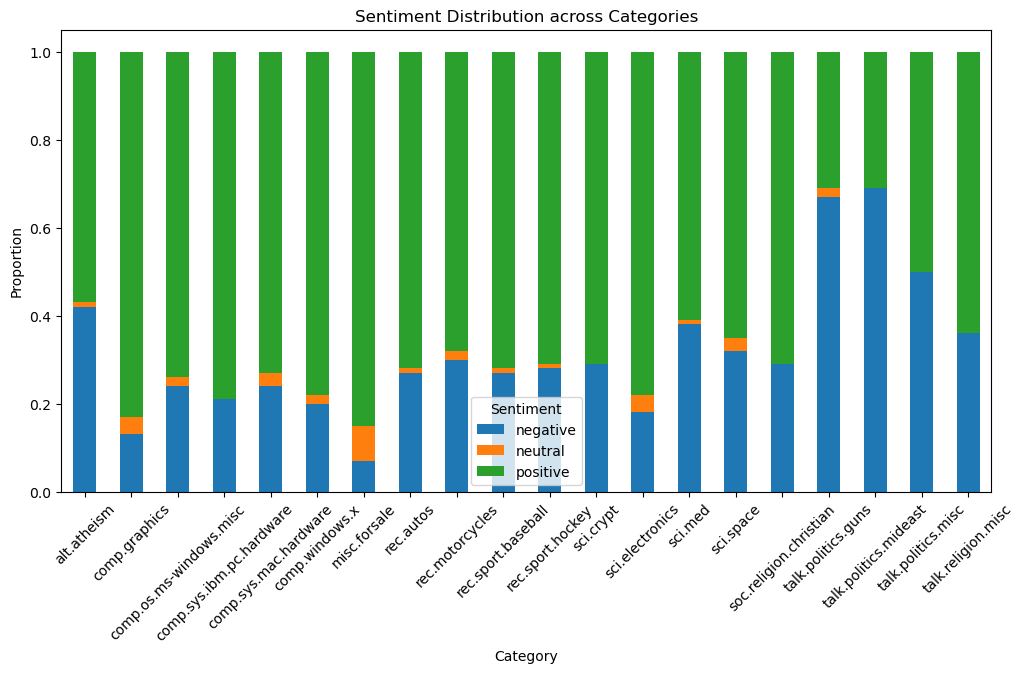

In [15]:
# Visualizing Sentiment Distribution across Categories
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index')
sentiment_dist.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

### Implications of Sentiment Analysis

- Contextual Nuance: Reflecting on our sentiment results, we can confirm that while Naive Bayes is great at finding "what" the blog is about (classification), the sentiment analysis explains the "how" (tone).


Category Tone: For instance, if `talk.politics.guns` showed lower accuracy but higher negative sentiment, it implies that heated language makes it harder for the model to find the core "theme" words among the "emotional" words.